#### Pavlo Yatluk
#### dz_69

### ЗАВДАННЯ

#### З бібліотеки датасетів Tensorflow за допомогою функції tfds.load завантажте датасет  під назвою “cars196”. Застосуйте до зображення із цього датасету аугментаційні перетворення:  дзеркальне відображення, зміна насиченості кольорів, відображення в grayscale, поворот на 90 градусів, обрізка по краях, зміна яскравості.


In [2]:
!pip install tensorflow_datasets

     ---------------------------------------- 0.0/5.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.4 MB 1.3 MB/s eta 0:00:05
      --------------------------------------- 0.1/5.4 MB 1.3 MB/s eta 0:00:05
     - -------------------------------------- 0.2/5.4 MB 1.6 MB/s eta 0:00:04
     -- ------------------------------------- 0.3/5.4 MB 1.6 MB/s eta 0:00:04
     --- ------------------------------------ 0.5/5.4 MB 2.0 MB/s eta 0:00:03
     ---- ----------------------------------- 0.6/5.4 MB 2.1 MB/s eta 0:00:03
     ---- ----------------------------------- 0.6/5.4 MB 1.9 MB/s eta 0:00:03
     ----- ---------------------------------- 0.7/5.4 MB 1.9 MB/s eta 0:00:03
     ------ --------------------------------- 0.8/5.4 MB 2.1 MB/s eta 0:00:03
     ------ --------------------------------- 0.9/5.4 MB 2.1 MB/s eta 0:00:03
     ------- -------------------------------- 1.0/5.4 MB 2.1 MB/s eta 0:00:03
     -------- ------------------------------- 1.2/5.4 MB 2.1 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: C:\Users\Pavel\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

In [4]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cars196',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)
     

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Pavel\tensorflow_datasets\cars196\2.1.0.incompleteL9LIF9\cars196-train.tfrecord*...:   0%| …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Pavel\tensorflow_datasets\cars196\2.1.0.incompleteL9LIF9\cars196-test.tfrecord*...:   0%|  …

Dataset cars196 downloaded and prepared to C:\Users\Pavel\tensorflow_datasets\cars196\2.1.0. Subsequent calls will reuse this data.


In [5]:
get_label_name = metadata.features['label'].int2str

In [12]:
n=1
for i, (image, label) in enumerate(test_ds):
  if i== n-1:
    break

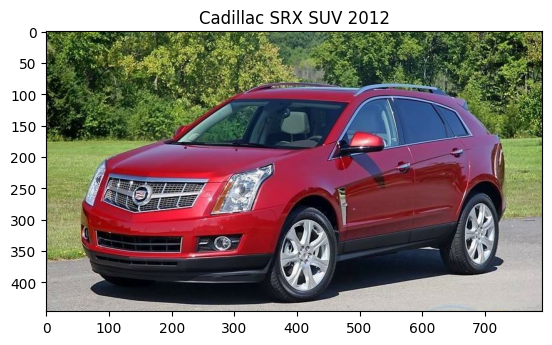

In [13]:
plt.imshow(image)
plt.title(get_label_name(label));

In [14]:
# Функція для відображення зміненого зображення 
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off") 
    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.axis("off")

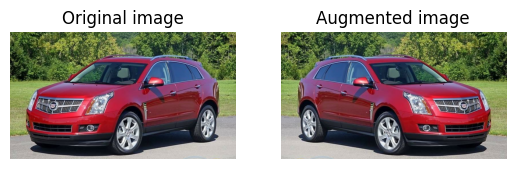

In [15]:
# дзеркальне відображення
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

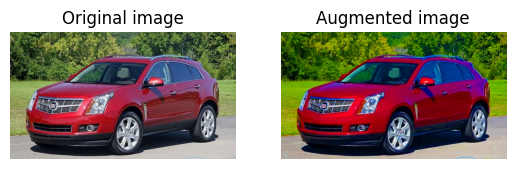

In [16]:
# Зміна насиченості кольорів
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

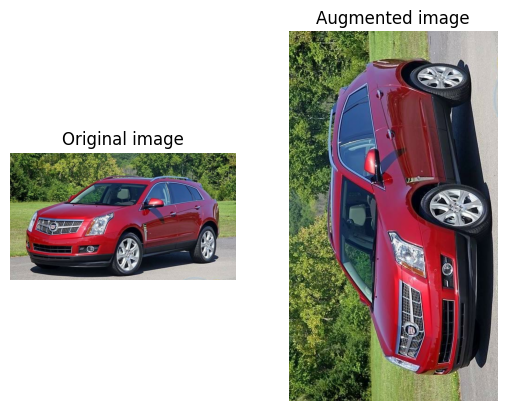

In [17]:
# поворот на 90 градусів
rotated = tf.image.rot90(image)
visualize(image, rotated)

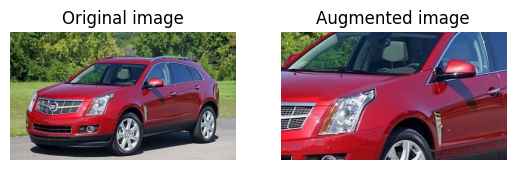

In [18]:
# Обрізання по краях
cropped = tf.image.central_crop(image, 
                                central_fraction=0.5)
visualize(image, cropped)

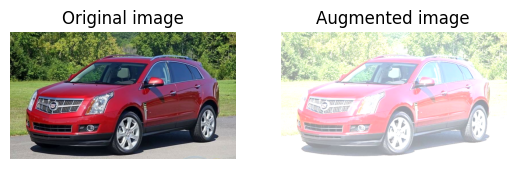

In [19]:
# зміна яскравості
bright = tf.image.adjust_brightness(image, 0.6)
visualize(image, bright)